In [1]:
# https://towardsdatascience.com/simple-logistic-regression-using-python-scikit-learn-86bf984f61f1

In [2]:
# import libraries and dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_string_dtype, is_numeric_dtype

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
warnings.filterwarnings("ignore")
df = pd.read_csv("Train_Test_Linux_memory (2).csv")
df.head()

ts    PID  MINFLT  MAJFLT  VSTEXT   VSIZE    RSIZE  VGROW  RGROW  \
0  1556129658   1494       0     0.0  2219.0   390.0  82020.0    0.0    0.0   
1  1556129738   1641       0     0.0    12.0  9480.0   3496.0    0.0    0.0   
2  1556129778   6604       0     0.0     0.0     0.0      0.0    0.0    0.0   
3  1556129788  51017       0     0.0     0.0     0.0      0.0    0.0    0.0   
4  1556129798   2766       0     0.0    10.0     1.3  68724.0    0.0    0.0   

    MEM             CMD  label type  
0  0.02            Xorg      1  dos  
1  0.00         haveged      1  dos  
2  0.00     kworker/0:1      1  dos  
3  0.00  <kworker/u256>      1  dos  
4  0.02          compiz      1  dos

In [3]:
# address missing value
df.isnull().sum()
missing_count = df.isnull().sum() # the count of missing values
value_count = df.isnull().count() # the count of all values
missing_percentage = round(missing_count / value_count * 100, 1) #the percentage of missing values
missing_df = pd.DataFrame({'count': missing_count, 'percentage': missing_percentage}) #create a dataframe
print(missing_df)

        count  percentage
ts          0         0.0
PID         0         0.0
MINFLT      0         0.0
MAJFLT      0         0.0
VSTEXT      0         0.0
VSIZE       0         0.0
RSIZE       0         0.0
VGROW       0         0.0
RGROW       0         0.0
MEM         0         0.0
CMD         0         0.0
label       0         0.0
type        0         0.0


In [4]:
# calculate duplicates 
dups = df.duplicated() 
# report if there are any duplicates 
print(dups.any()) 
# list all duplicate rows 
print(df[dups])
print(df.shape) 
# delete duplicate rows 
df.drop_duplicates(inplace=True) 
print(df.shape)

False
Empty DataFrame
Columns: [ts, PID, MINFLT, MAJFLT, VSTEXT, VSIZE, RSIZE, VGROW, RGROW, MEM, CMD, label, type]
Index: []
(140112, 13)
(140112, 13)


In [5]:
df['type'].value_counts()

normal       100000
dos           10000
ddos          10000
injection     10000
password      10000
mitm            112
Name: type, dtype: int64

In [6]:
# df.type.replace(['normal','ddos','dos','injection','password','mitm' ], [0, 1, 2, 3, 4, 5], inplace=True)

In [7]:
df

ts    PID  MINFLT  MAJFLT  VSTEXT    VSIZE    RSIZE    VGROW  \
0       1556129658   1494       0     0.0  2219.0    390.0  82020.0      0.0   
1       1556129738   1641       0     0.0    12.0   9480.0   3496.0      0.0   
2       1556129778   6604       0     0.0     0.0      0.0      0.0      0.0   
3       1556129788  51017       0     0.0     0.0      0.0      0.0      0.0   
4       1556129798   2766       0     0.0    10.0      1.3  68724.0      0.0   
...            ...    ...     ...     ...     ...      ...      ...      ...   
140107  1554256770   4373    2076     0.0   148.0  17648.0   2408.0      0.0   
140108  1554256775   1851       0     0.0    36.0    159.8   2000.0      0.0   
140109  1554256780   1371       5     0.0    36.0  19296.0    640.0      0.0   
140110  1554256785   1668       0     0.0    12.0   9480.0    292.0      0.0   
140111  1554256790   1442    1902    22.0  2219.0    811.2    255.7  11764.0   

          RGROW   MEM             CMD  label    type  
0           0.0  0.02            Xorg      1     dos  
1           0.0  0.00         haveged      1     dos  
2           0.0  0.00     kworker/0:1      1     dos  
3           0.0  0.00  <kworker/u256>      1     dos  
4           0.0  0.02          compiz      1     dos  
...         ...   ...             ...    ...     ...  
140107      0.0  0.00            atop      0  normal  
140108      0.0  0.00        vmtoolsd      0  normal  
140109      0.0  0.00      irqbalance      0  normal  
140110      0.0  0.00         haveged      0  normal  
140111  15736.0  0.07            Xorg      0  normal  

[140112 rows x 13 columns]

In [8]:
# drop columns 
df = df.drop(['ts','label'], axis=1)

In [9]:
import category_encoders as ce
encoder= ce.BinaryEncoder(cols=['PID','CMD'],return_df=True)

In [10]:
df=encoder.fit_transform(df) 

In [11]:
df

PID_0  PID_1  PID_2  PID_3  PID_4  PID_5  PID_6  PID_7  PID_8  PID_9  \
0           0      0      0      0      0      0      0      0      0      0   
1           0      0      0      0      0      0      0      0      0      0   
2           0      0      0      0      0      0      0      0      0      0   
3           0      0      0      0      0      0      0      0      0      1   
4           0      0      0      0      0      0      0      0      0      1   
...       ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
140107      0      0      0      0      1      0      1      1      0      1   
140108      0      0      0      0      1      0      1      1      1      0   
140109      0      0      0      0      1      0      1      1      1      0   
140110      0      0      0      0      1      1      0      0      1      1   
140111      0      0      0      0      1      0      1      1      1      1   

        ...  CMD_0  CMD_1  CMD_2  CMD_3  CMD_4  CMD_5  CMD_6  CMD_7  CMD_8  \
0       ...      0      0      0      0      0      0      0      0      1   
1       ...      0      0      0      0      0      0      0      1      0   
2       ...      0      0      0      0      0      0      0      1      1   
3       ...      0      0      0      0      0      0      1      0      0   
4       ...      0      0      0      0      0      0      1      0      1   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
140107  ...      0      0      0      0      0      1      0      1      1   
140108  ...      0      0      0      0      0      1      0      1      0   
140109  ...      0      0      0      0      0      0      1      1      1   
140110  ...      0      0      0      0      0      0      0      1      0   
140111  ...      0      0      0      0      0      0      0      0      1   

          type  
0          dos  
1          dos  
2          dos  
3          dos  
4          dos  
...        ...  
140107  normal  
140108  normal  
140109  normal  
140110  normal  
140111  normal  

[140112 rows x 30 columns]

In [12]:
list(df.columns.values)

['PID_0',
 'PID_1',
 'PID_2',
 'PID_3',
 'PID_4',
 'PID_5',
 'PID_6',
 'PID_7',
 'PID_8',
 'PID_9',
 'PID_10',
 'PID_11',
 'MINFLT',
 'MAJFLT',
 'VSTEXT',
 'VSIZE',
 'RSIZE',
 'VGROW',
 'RGROW',
 'MEM',
 'CMD_0',
 'CMD_1',
 'CMD_2',
 'CMD_3',
 'CMD_4',
 'CMD_5',
 'CMD_6',
 'CMD_7',
 'CMD_8',
 'type']

In [13]:
len(df.columns)

30

In [14]:
# select and rearrange columns
df = df[['MINFLT',
 'MAJFLT',
 'VSTEXT',
 'VSIZE',
 'RSIZE',
 'VGROW',
 'RGROW',
 'MEM','PID_0',
 'PID_1',
 'PID_2',
 'PID_3',
 'PID_4',
 'PID_5',
 'PID_6',
 'PID_7',
 'PID_8',
 'PID_9',
 'PID_10',
 'PID_11',
 'CMD_0',
 'CMD_1',
 'CMD_2',
 'CMD_3',
 'CMD_4',
 'CMD_5',
 'CMD_6',
 'CMD_7',
 'CMD_8',
 'type']]

In [15]:
len(df.columns)

30

In [16]:
#numerical variables for scaling
n = df.iloc[:,:-22]

In [17]:
from sklearn.preprocessing import RobustScaler
from sklearn import preprocessing

scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(n)
robust_df = pd.DataFrame(robust_df, columns =['MINFLT',
 'MAJFLT',
 'VSTEXT',
 'VSIZE',
 'RSIZE',
 'VGROW',
 'RGROW',
 'MEM'])

In [18]:
# extracting not scaled features (target feature + categorical features)
extracted_col= df[['PID_0',
 'PID_1',
 'PID_2',
 'PID_3',
 'PID_4',
 'PID_5',
 'PID_6',
 'PID_7',
 'PID_8',
 'PID_9',
 'PID_10',
 'PID_11',
 'CMD_0',
 'CMD_1',
 'CMD_2',
 'CMD_3',
 'CMD_4',
 'CMD_5',
 'CMD_6',
 'CMD_7',
 'CMD_8',
 'type']]
standardized_df = robust_df.join(extracted_col)

In [19]:
# reset index
robust_df.reset_index(drop=True, inplace=True)
extracted_col.reset_index(drop=True, inplace=True)

In [20]:
standardized_df = robust_df.join(extracted_col)

In [21]:
len(standardized_df.columns)

30

In [22]:
X = standardized_df.iloc[:,:-1]
y = standardized_df["type"]

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from statistics import mean, stdev
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
 
from sklearn.linear_model import LassoCV
from sklearn.model_selection import StratifiedKFold

X = standardized_df.iloc[:,:-1]
y = standardized_df["type"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)



lr = LogisticRegression(penalty='l1',C=1, solver='liblinear', max_iter=1000, random_state=42)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

              precision    recall  f1-score   support

        ddos       0.88      0.81      0.84      3000
         dos       0.53      0.49      0.51      3000
   injection       0.74      0.37      0.49      3000
        mitm       1.00      0.53      0.69        34
      normal       0.90      0.98      0.94     30000
    password       0.95      0.81      0.88      3000

    accuracy                           0.87     42034
   macro avg       0.83      0.66      0.73     42034
weighted avg       0.87      0.87      0.86     42034



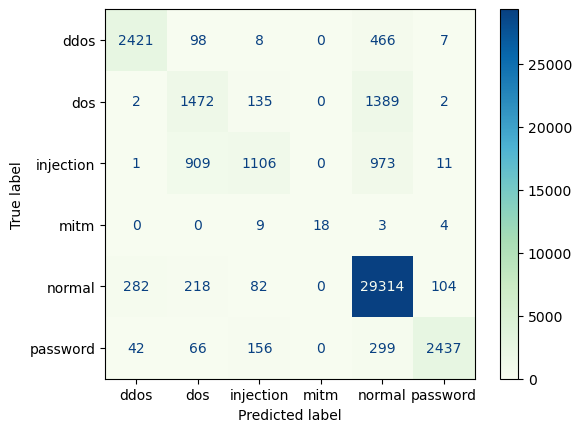

In [24]:
from sklearn import metrics

# confusion matrix
confusion_matrix = metrics.plot_confusion_matrix(lr, X_test, y_test, cmap = "GnBu")
print(confusion_matrix)

# accuracy
print(classification_report(y_test, y_pred))

In [25]:
# drop columns 
df = df.drop(['ts', 'time','type','date','min','sec','hour','month'], axis=1)

KeyError: "['ts', 'time', 'date', 'min', 'sec', 'hour', 'month'] not found in axis"

In [ ]:
df

In [ ]:
# transform int to string
df['label'] = df['label'].astype(str)

In [ ]:
df.temp_condition.unique()

In [ ]:
df.temp_condition.replace(['high ', 'low ', 'low  ', 'high  '], ['high','low','low','high'], inplace=True)

In [ ]:
df.temp_condition.unique()

In [ ]:
# populate the numerical and categorical variables
num_list = []
cat_list = []
for column in df:
   if column != 'label': # separate lable
       if is_numeric_dtype(df[column]):
           num_list.append(column)
       elif is_string_dtype(df[column]):
           cat_list.append(column)

In [ ]:
num_list


In [ ]:
cat_list

In [ ]:
### 2. Feature Engineering and EDA  ###

In [ ]:
# univariate analysis
for column in df:
   plt.figure(column, figsize = (5,5))
   plt.title(column)
   if is_numeric_dtype(df[column]):
       df[column].plot(kind = 'hist')
   elif is_string_dtype(df[column]):
       df[column].value_counts()[:10].plot(kind = 'bar')


In [ ]:
df

In [ ]:
# encoding categorical data using dummies
#from sklearn.preprocessing import LabelEncoder
#categorical_features = ['label']
#for i in categorical_features:
  # df[i] = LabelEncoder().fit_transform(df[i])

In [ ]:
# encoding categorical data using dummies
from sklearn.preprocessing import LabelEncoder
categorical_features = ['label']
for i in categorical_features:
   df[i] = LabelEncoder().fit_transform(df[i])

In [ ]:
import category_encoders as ce
encoder= ce.BinaryEncoder(cols=['day_name'],return_df=True)

In [ ]:
df=encoder.fit_transform(df) 

In [ ]:
from category_encoders import OrdinalEncoder 
maplist = [{'col': 'temp_condition', 'mapping': {'low': 0, 'high': 1}}]
oe = OrdinalEncoder(mapping=maplist)

In [ ]:
df=oe.fit_transform(df) 

In [ ]:
df

In [ ]:
df.columns

In [ ]:
list(df.columns)

In [ ]:
# multivariate analysis
plt.figure(1, figsize = (15,15))
correlation = df.corr()
sns.heatmap(correlation, cmap = "GnBu", annot = True)


In [ ]:
# select and rearrange columns
df = df[['fridge_temperature', 'temp_condition', 'hour_sin', 'hour_cos', 'month_sin',
       'month_cos' ,'day_name_0',
       'day_name_1', 'day_name_2', 'label']]

In [ ]:
df

In [ ]:
#numerical variables for scaling
n = df.iloc[:,:-4]

In [ ]:
n.head()

In [ ]:
from sklearn.preprocessing import RobustScaler
from sklearn import preprocessing

scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(n)
robust_df = pd.DataFrame(robust_df, columns =['fridge_temperature', 'temp_condition', 'hour_sin', 'hour_cos', 'month_sin',
       'month_cos'])

In [ ]:
robust_df

In [ ]:
result = df.dtypes
print(result)

In [ ]:
# extracting not scaled features (target feature + categorical features)
extracted_col= df[['day_name_0',
 'day_name_1',
 'day_name_2','label']]
standardized_df = robust_df.join(extracted_col)

In [ ]:
# reset index
robust_df.reset_index(drop=True, inplace=True)
extracted_col.reset_index(drop=True, inplace=True)

In [ ]:
standardized_df = robust_df.join(extracted_col)

In [ ]:
# new dataframe, which is used for Logistic Regression
standardized_df

In [ ]:
X = standardized_df.iloc[:,:-1]
y = standardized_df["label"]

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from statistics import mean, stdev
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
 
from sklearn.linear_model import LassoCV
from sklearn.model_selection import StratifiedKFold

X = standardized_df.iloc[:,:-1]
y = standardized_df["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)



lr = LogisticRegression(penalty='l1',C=1, solver='liblinear', class_weight='balanced', max_iter=1000, random_state=42)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [ ]:
from sklearn import metrics

# confusion matrix
confusion_matrix = metrics.plot_confusion_matrix(lr, X_test, y_test, cmap = "GnBu")
print(confusion_matrix)

# accuracy
print(classification_report(y_test, y_pred))

In [ ]:
### 3. Model Building  ###

# split dataset
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
X = df.iloc[:,:-1]
y = df["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0, stratify =y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# implement logistic regression
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression(max_iter = 300)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [ ]:
### 4. Model Evaluation  ###
from sklearn import metrics

# confusion matrix
confusion_matrix = metrics.plot_confusion_matrix(reg, X_test, y_test, cmap = "GnBu")
print(confusion_matrix)

# accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))



# ROC curve and AUC
y_pred_proba = reg.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test,  y_pred_proba)
plt.plot(fpr,tpr)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
print("AUC:", round(auc,2))

In [ ]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred)

In [ ]:
# recall
from sklearn.metrics import recall_score

recall_score(y_test, y_pred)

In [ ]:
# precision
from sklearn.metrics import precision_score

precision_score(y_test, y_pred)